In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt


In [2]:
dai = pd.read_csv('podatki/delovno-aktivno-obcina-izobrazba-spol.csv',sep=' ',encoding='cp1250')
#občine, leto, dosežena izobrazba, spol 
#link: https://pxweb.stat.si/SiStatData/pxweb/sl/Data/-/0764721S.PX
dai

,OBČINE,2005 Izobrazba - SKUPAJ Spol - SKUPAJ,2005 Izobrazba - SKUPAJ Moški,2005 Izobrazba - SKUPAJ Ženske,2005 Osnovnošolska ali manj Spol - SKUPAJ,2005 Osnovnošolska ali manj Moški,2005 Osnovnošolska ali manj Ženske,2005 Srednješolska Spol - SKUPAJ,2005 Srednješolska Moški,2005 Srednješolska Ženske,...,2021 Osnovnošolska ali manj Ženske,2021 Srednješolska Spol - SKUPAJ,2021 Srednješolska Moški,2021 Srednješolska Ženske,"2021 Višješolska, visokošolska Spol - SKUPAJ","2021 Višješolska, visokošolska Moški","2021 Višješolska, visokošolska Ženske",2021 Neznano Spol - SKUPAJ,2021 Neznano Moški,2021 Neznano Ženske
0,SLOVENIJA,813529,454704,358825,166006,100017,65989,467661,274130,193532,...,30819,504707,319765,184942,329001,133706,195295,-,-,-
1,Ajdovščina,7351,4298,3052,1658,1063,595,4190,2614,1575,...,333,4938,3242,1696,3064,1217,1847,-,-,-
2,Beltinci,3348,1849,1499,907,510,397,1992,1129,863,...,135,1999,1146,853,947,366,581,-,-,-
3,Bled,4343,2373,1970,569,324,245,2648,1530,1118,...,54,1738,1086,652,1683,713,970,-,-,-
4,Bohinj,2184,1235,949,327,169,158,1471,902,570,...,61,1470,917,553,957,397,560,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,Rečica ob Savinji,-,-,-,-,-,-,-,-,-,...,39,667,458,209,321,120,201,-,-,-
209,Sveti Jurij v Slov. goricah,-,-,-,-,-,-,-,-,-,...,58,505,310,195,226,77,149,-,-,-
210,Šentrupert,-,-,-,-,-,-,-,-,-,...,29,750,495,255,342,120,222,-,-,-
211,Mirna,-,-,-,-,-,-,-,-,-,...,44,755,462,293,436,168,268,-,-,-


In [3]:
dsa = pd.read_csv('podatki/delovno-aktivno-status-aktivnosti7.csv',sep=' ',encoding='cp1250')
#Delovno aktivno prebivalstvo po statusu aktivnosti in občinah delovnega mesta, Slovenija, mesečno
#Link: https://pxweb.stat.si/SiStatData/pxweb/sl/Data/-/0700941S.px
dsa

,OBČINE,DELOVNO AKTIVNO PREBIVALSTVO,2005M01,2006M01,2007M01,2008M01,2009M01,2010M01,2011M01,2012M01,2013M01,2014M01,2015M01,2016M01,2017M01,2018M01,2019M01,2020M01,2021M01,2022M01
0,SLOVENIJA,1 Delovno aktivno prebivalstvo - SKUPAJ,805637,812486,838005,867342,872246,836081,820866,811568,788711,781561,794254,797997,822660,854391,881245,895365,881817,909481
1,SLOVENIJA,123 Samozaposlene osebe - kmetje,31339,32210,36109,35050,32218,26559,32829,30446,32879,26859,27605,18908,17378,19803,20379,21230,20824,20137
2,Ajdovščina,1 Delovno aktivno prebivalstvo - SKUPAJ,6845,6616,6757,6975,7104,6711,6525,6206,5358,5409,5611,5539,5939,6263,6654,7245,7371,7755
3,Ajdovščina,123 Samozaposlene osebe - kmetje,162,166,186,181,166,133,127,246,265,242,269,150,135,129,138,236,221,222
4,Ankaran/Ancarano,1 Delovno aktivno prebivalstvo - SKUPAJ,-,-,-,-,-,-,-,-,-,-,814,842,910,926,983,1000,965,997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,Žiri,123 Samozaposlene osebe - kmetje,69,71,79,77,71,59,72,110,110,106,86,62,67,75,70,43,42,41
422,Žirovnica,1 Delovno aktivno prebivalstvo - SKUPAJ,525,554,598,643,690,638,616,662,602,637,675,668,686,711,748,737,718,737
423,Žirovnica,123 Samozaposlene osebe - kmetje,18,18,20,20,18,16,18,35,37,32,30,21,20,22,21,20,18,17
424,Žužemberk,1 Delovno aktivno prebivalstvo - SKUPAJ,868,925,978,981,982,903,975,961,970,937,1000,937,966,1008,1070,1052,1025,1106


In [4]:
ppo = pd.read_csv('podatki/prebivalstvo-po-občinah.csv',sep=' ',encoding='cp1250', low_memory=False)
#Prebivalstvo po velikih in petletnih starostnih skupinah in spolu, občine, Slovenija, polletno#Link: https://pxweb.stat.si/SiStatData/pxweb/sl/Data/-/0952752S.px
#Link: https://pxweb.stat.si/SiStatData/pxweb/sl/Data/-/05C4004S.px
ppo

,SPOL,OBČINE,1999H2 Starost - SKUPAJ,1999H2 0-14 let,1999H2 15-64 let,1999H2 65 + let,1999H2 0-4 let,1999H2 5-9 let,1999H2 10-14 let,1999H2 15-19 let,...,2021H2 55-59 let,2021H2 60-64 let,2021H2 65-69 let,2021H2 70-74 let,2021H2 75-79 let,2021H2 80-84 let,2021H2 85-89 let,2021H2 90-94 let,2021H2 95-99 let,2021H2 100 + let
0,Spol - SKUPAJ,SLOVENIJA,1985557,325303,1388107,272147,93052,105757,126494,142677,...,152636,144104,137282,111499,75057,61550,37065,14849,3042,305
1,Spol - SKUPAJ,Ajdovščina,17780,3132,12093,2555,877,1048,1207,1265,...,1384,1315,1265,1080,548,561,348,136,26,3
2,Spol - SKUPAJ,Ankaran/Ancarano,-,-,-,-,-,-,-,-,...,266,262,291,221,127,90,62,14,2,0
3,Spol - SKUPAJ,Apače,-,-,-,-,-,-,-,-,...,303,261,257,204,133,74,50,14,4,0
4,Spol - SKUPAJ,Beltinci,8529,1486,5912,1131,439,500,547,630,...,642,569,599,393,341,222,116,44,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,Ženske,Železniki,3362,706,2138,518,209,217,280,258,...,229,219,169,151,114,120,70,36,8,0
635,Ženske,Žetale,685,116,416,153,33,34,49,47,...,54,60,30,28,17,20,15,7,1,0
636,Ženske,Žiri,2500,485,1571,444,148,159,178,183,...,178,150,150,117,90,111,62,29,9,0
637,Ženske,Žirovnica,2015,297,1354,364,71,109,117,115,...,167,150,155,130,116,81,53,20,3,0


In [5]:
# Slovar - ključ = leto
slovar2 = {} 
obc = [] #občine
delez_kmetje = []
leto = 2005 # začetno leto

komplet = 0 # Ko doseze tri pregledamo vse tri vrstice za obcino
for i in range(2, dsa.shape[1] - 1): # 10 lahko spremenimo da dobimo drugo vrednost (npr osnovnešole itd)
    for index, row in dsa.iterrows():        
        #if (row[i] == "z"):
        #    print(leto, row[0], row[i])
        if (row[i] == "-" or row[i] == "z"  or row[0] == "SLOVENIJA"): ## z ker kostel in Osilnica leta 2019 vrednost 'z'
            continue # podatek manjka oziroma je za celotno Slovenijo zato preskočimo..
        komplet += 1
        
        if (komplet == 1):
            # prva vrstica - skupno delovno aktivno
            skupno = row[i]
        
        if (komplet == 2):
            delez = int(row[i]) / int(skupno)
            #print(row[0], delez)
            komplet = 0
            obc.append(row[0])
            delez_kmetje.append(delez)
            
    slovar2[leto] = [obc, delez_kmetje]
   
    print(leto, len(slovar2[leto][0])) # Vidimo koliko občin ima podatke za določeno leto
    
    leto+=1
    
    # Resetiram..
    obc = []
    delez_kmetje = []


2005 193
2006 193
2007 210
2008 210
2009 210
2010 210
2011 210
2012 211
2013 211
2014 211
2015 212
2016 212
2017 212
2018 Kostel z
2018 Mengeš z
2018 Osilnica z
2018 Trzin z
2018 210
2019 Hodoš/Hodos z
2019 Kobilje z
2019 Mengeš z
2019 Trzin z
2019 209
2020 Hodoš/Hodos z
2020 Kobilje z
2020 211
2021 Hodoš/Hodos z
2021 Kobilje z
2021 211


In [6]:
# Uredim po abecedi da bom lahko združil tabeli
sdai = dai.sort_values(by=["OBČINE"], ascending=True)
sdai

,OBČINE,2005 Izobrazba - SKUPAJ Spol - SKUPAJ,2005 Izobrazba - SKUPAJ Moški,2005 Izobrazba - SKUPAJ Ženske,2005 Osnovnošolska ali manj Spol - SKUPAJ,2005 Osnovnošolska ali manj Moški,2005 Osnovnošolska ali manj Ženske,2005 Srednješolska Spol - SKUPAJ,2005 Srednješolska Moški,2005 Srednješolska Ženske,...,2021 Osnovnošolska ali manj Ženske,2021 Srednješolska Spol - SKUPAJ,2021 Srednješolska Moški,2021 Srednješolska Ženske,"2021 Višješolska, visokošolska Spol - SKUPAJ","2021 Višješolska, visokošolska Moški","2021 Višješolska, visokošolska Ženske",2021 Neznano Spol - SKUPAJ,2021 Neznano Moški,2021 Neznano Ženske
1,Ajdovščina,7351,4298,3052,1658,1063,595,4190,2614,1575,...,333,4938,3242,1696,3064,1217,1847,-,-,-
212,Ankaran/Ancarano,-,-,-,-,-,-,-,-,-,...,53,696,421,275,614,252,362,-,-,-
194,Apače,-,-,-,-,-,-,-,-,-,...,61,671,399,272,263,92,171,-,-,-
2,Beltinci,3348,1849,1499,907,510,397,1992,1129,863,...,135,1999,1146,853,947,366,581,-,-,-
147,Benedikt,824,478,346,218,129,89,481,282,199,...,60,687,403,284,293,108,185,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Železniki,2942,1682,1260,727,384,343,1662,1047,615,...,144,1690,1110,580,1092,450,642,-,-,-
190,Žetale,497,326,171,181,126,55,240,151,89,...,41,344,229,115,156,66,90,-,-,-
146,Žiri,2105,1188,917,398,227,172,1310,767,543,...,80,1322,838,484,806,302,504,-,-,-
191,Žirovnica,1649,895,753,149,93,56,997,587,410,...,26,1020,638,382,908,364,544,-,-,-


In [7]:
# Dodamo skupne podatke o prebivalstvu po občinah(SKUPAJ)
ppo_S = ppo.head(213)
ppo_S = ppo_S.drop(['SPOL'], axis = 1) #Znembim se uvodnega stolpca
mergedS = sdai.merge(ppo_S) 

# Dodamo podatke o prebivalstvu po občinah za moške
ppo_M = ppo.iloc[213:426]
ppo_M = ppo_M.drop(['SPOL'], axis = 1) #Znembim se uvodnega stolpca
#ppo_M.index = range(213)
mergedM = sdai.merge(ppo_M)

# Dodamo podatke o prebivalstvu po občinah za ženske
ppo_Z = ppo.tail(213)
ppo_Z = ppo_Z.drop(['SPOL'], axis = 1) #Znembim se uvodnega stolpca
mergedZ = sdai.merge(ppo_Z)




In [8]:
# Testiraš vrednosti kraja - vidiš razporeditev

#for index, row in mergedS.iterrows():
#     if row[0] == "Ljubljana":
#        for i in range(1381):
#            print(i, row[i])

#        break


0 Ljubljana
1 111786
2 59560
3 52226
4 20077
5 11880
6 8197
7 54376
8 30821
9 23555
10 37072
11 16700
12 20372
13 262
14 159
15 103
16 113887
17 61379
18 52508
19 20472
20 12492
21 7979
22 54993
23 31680
24 23313
25 38207
26 17083
27 21124
28 215
29 124
30 91
31 117169
32 63906
33 53263
34 21077
35 13232
36 7845
37 56495
38 33116
39 23379
40 39416
41 17460
42 21956
43 180
44 99
45 81
46 119516
47 65301
48 54215
49 22029
50 14243
51 7786
52 56395
53 33073
54 23321
55 40935
56 17901
57 23034
58 157
59 83
60 74
61 116900
62 63215
63 53685
64 18186
65 11471
66 6714
67 55565
68 32944
69 22621
70 43035
71 18728
72 24306
73 115
74 72
75 43
76 112576
77 60003
78 52573
79 16063
80 9933
81 6130
82 52801
83 31171
84 21630
85 43624
86 18841
87 24783
88 88
89 58
90 30
91 111389
92 58613
93 52776
94 14294
95 8513
96 5781
97 51409
98 30470
99 20939
100 45686
101 19630
102 26056
103 -
104 -
105 -
106 108198
107 56420
108 51778
109 12429
110 7184
111 5245
112 49717
113 29612
114 20105
115 46052
116 196

In [9]:
sdai.iloc[:,0:16] # Vidimo podatke za eno leto, 15 stolpcev na leto.. 255 / 15 = 17 -> 17 let [2005 - 2021]


,OBČINE,2005 Izobrazba - SKUPAJ Spol - SKUPAJ,2005 Izobrazba - SKUPAJ Moški,2005 Izobrazba - SKUPAJ Ženske,2005 Osnovnošolska ali manj Spol - SKUPAJ,2005 Osnovnošolska ali manj Moški,2005 Osnovnošolska ali manj Ženske,2005 Srednješolska Spol - SKUPAJ,2005 Srednješolska Moški,2005 Srednješolska Ženske,"2005 Višješolska, visokošolska Spol - SKUPAJ","2005 Višješolska, visokošolska Moški","2005 Višješolska, visokošolska Ženske",2005 Neznano Spol - SKUPAJ,2005 Neznano Moški,2005 Neznano Ženske
1,Ajdovščina,7351,4298,3052,1658,1063,595,4190,2614,1575,1413,573,840,90,48,42
212,Ankaran/Ancarano,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
194,Apače,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2,Beltinci,3348,1849,1499,907,510,397,1992,1129,863,412,184,228,37,26,11
147,Benedikt,824,478,346,218,129,89,481,282,199,59,20,39,66,46,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Železniki,2942,1682,1260,727,384,343,1662,1047,615,516,225,291,38,27,11
190,Žetale,497,326,171,181,126,55,240,151,89,41,17,24,35,31,4
146,Žiri,2105,1188,917,398,227,172,1310,767,543,372,176,196,25,18,7
191,Žirovnica,1649,895,753,149,93,56,997,587,410,485,202,283,18,14,4


In [10]:
sdai.iloc[:,10::15] # Vidimo podatke za vse leta za Visokošolsko SKUPAJ (M + Ž)
# Če 10 spremeniš v 7 dobiš za srednješolsko, če v 4 pa za osnovnošolsko

,"2005 Višješolska, visokošolska Spol - SKUPAJ","2006 Višješolska, visokošolska Spol - SKUPAJ","2007 Višješolska, visokošolska Spol - SKUPAJ","2008 Višješolska, visokošolska Spol - SKUPAJ","2009 Višješolska, visokošolska Spol - SKUPAJ","2010 Višješolska, visokošolska Spol - SKUPAJ","2011 Višješolska, visokošolska Spol - SKUPAJ","2012 Višješolska, visokošolska Spol - SKUPAJ","2013 Višješolska, visokošolska Spol - SKUPAJ","2014 Višješolska, visokošolska Spol - SKUPAJ","2015 Višješolska, visokošolska Spol - SKUPAJ","2016 Višješolska, visokošolska Spol - SKUPAJ","2017 Višješolska, visokošolska Spol - SKUPAJ","2018 Višješolska, visokošolska Spol - SKUPAJ","2019 Višješolska, visokošolska Spol - SKUPAJ","2020 Višješolska, visokošolska Spol - SKUPAJ","2021 Višješolska, visokošolska Spol - SKUPAJ"
1,1413,1499,1590,1697,1786,1852,1981,2043,2086,2215,2299,2432,2626,2735,2818,2943,3064
212,-,-,-,-,-,-,-,-,-,-,516,547,582,576,587,602,614
194,-,-,127,142,149,155,167,179,185,192,206,224,235,244,251,251,263
2,412,446,470,498,533,566,594,622,656,670,700,736,773,825,869,899,947
147,59,69,79,98,107,123,150,159,178,184,201,210,226,249,247,262,293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,516,539,573,596,610,639,717,780,823,849,886,932,1008,1042,1067,1081,1092
190,41,47,53,63,62,60,76,74,89,100,112,117,131,146,148,141,156
146,372,375,405,429,461,497,533,553,564,595,628,672,727,749,766,776,806
191,485,531,563,590,608,613,669,690,717,718,749,779,826,858,858,870,908


In [11]:
## FOR LOOP ZA DOBIVANJE VSEH VREDNOSTI (VSA LETA) DOLOČENEGA STOLPCA 
for index, row in sdai.iterrows():
    print(row[0]) # Izpišemo za kateri kraj so ti podatki.
    
    for i in range(10, len(row), 15): # 10 lahko spremenimo da dobimo drugo vrednost
        print(i, row[i])
    break; # Breakamo po prvi vrstici(demonstracija delovanja)

Ajdovščina
10 1413
25 1499
40 1590
55 1697
70 1786
85 1852
100 1981
115 2043
130 2086
145 2215
160 2299
175 2432
190 2626
205 2735
220 2818
235 2943
250 3064


In [12]:
## Potem nisem uporabil..

# Poglejmo kje se nahajajo podatki o starosti, ki jih bomo uporabili za normalizacijo
#print(mergedS.columns.get_loc("2005H2 15-64 let"))
#print(mergedS.columns.get_loc("2006H2 15-64 let"))
#print(mergedS.columns.get_loc("2007H2 15-64 let"))
#print(mergedS.columns.get_loc("2008H2 15-64 let"))
#print(mergedS.columns.get_loc("2009H2 15-64 let"))
#print(mergedS.columns.get_loc("2010H2 15-64 let"))
#print(mergedS.columns.get_loc("2011H2 15-64 let"))
#print(mergedS.columns.get_loc("2012H2 15-64 let"))
#print(mergedS.columns.get_loc("2013H2 15-64 let"))
#print(mergedS.columns.get_loc("2014H2 15-64 let"))
#print(mergedS.columns.get_loc("2015H2 15-64 let"))
#print(mergedS.columns.get_loc("2016H2 15-64 let"))
#print(mergedS.columns.get_loc("2017H2 15-64 let"))
#print(mergedS.columns.get_loc("2018H2 15-64 let"))
#print(mergedS.columns.get_loc("2019H2 15-64 let"))
#print(mergedS.columns.get_loc("2020H2 15-64 let"))
#print(mergedS.columns.get_loc("2021H2 15-64 let"))
# Vidimo da začnemo v 558 stolpcu in se premikamo s korakom 50 za pridobitve podatka naslednjega leta

In [13]:
# Slovar - ključ = leto
slovar = {} 
LJ_vs = []
LJ_ss = []
LJ_os = []
MB_vs = []
MB_ss = []
MB_os = []
KP_vs = []
KP_ss = []
KP_os = []
CE_vs = []
CE_ss = []
CE_os = []
BL_vs = []
BL_ss = []
BL_os = []

obc = [] #občine
## VISOKOŠOLSKA
VS_v = [] #vrednosti
VS_n = [] #normalizirane vrednosti
# SREDNJEŠOLSKA
SS_v = [] #vrednosti
SS_n = [] #normalizirane vrednosti
# OSNOVNOŠOLSKA
OS_v = [] #vrednosti
OS_n = [] #normalizirane vrednosti
leto = 2005 # začetno leto
j = 558 # index ki kaže na stolpec s podatki o prebivalstvu med 15-64 let (558 -> za leto 2005)
for i in range(10, 256, 15): # 10 lahko spremenimo da dobimo drugo vrednost (npr osnovnešole itd)
    for index, row in mergedS.iterrows():        
        
        if (row[i] == "-" or row[i] == "z" or row[0] == "SLOVENIJA"): ## z ker kostel in Osilnica leta 2019 vrednost 'z'
            continue # podatek manjka oziroma je za celotno Slovenijo zato preskočimo..
        
        vsota = int(row[i]) + int(row[i-3]) + int(row[i-6])
        if (row[0] == "Ljubljana"):
            
            LJ_vs.append(int(row[i]) / vsota)
            LJ_ss.append(int(row[i-3]) / vsota)
            LJ_os.append(int(row[i-6]) / vsota)
        elif (row[0] == "Maribor"):
            MB_vs.append(int(row[i]) / vsota)
            MB_ss.append(int(row[i-3]) / vsota)
            MB_os.append(int(row[i-6]) / vsota)
        elif (row[0] == "Koper/Capodistria"):
            KP_vs.append(int(row[i]) / vsota)
            KP_ss.append(int(row[i-3]) / vsota)
            KP_os.append(int(row[i-6]) / vsota)
        elif (row[0] == "Celje"):
            CE_vs.append(int(row[i]) / vsota)
            CE_ss.append(int(row[i-3]) / vsota)
            CE_os.append(int(row[i-6]) / vsota)  
        elif (row[0] == "Bled"):
            BL_vs.append(int(row[i]) / vsota)
            BL_ss.append(int(row[i-3]) / vsota)
            BL_os.append(int(row[i-6]) / vsota)
        
        obc.append(row[0])
        VS_v.append(int(row[i]))
        VS_n.append(int(row[i]) / vsota)
        SS_v.append(int(row[i-3]))
        SS_n.append(int(row[i-3]) / vsota)
        OS_v.append(int(row[i-6]))
        OS_n.append(int(row[i-6]) / vsota)
    
    slovar[leto] = [obc, VS_v, VS_n, SS_v, SS_n, OS_v, OS_n]
    j += 50
   
    print(leto, len(slovar[leto][0])) # Vidimo koliko občin ima podatke za določeno leto
    
    leto+=1
    
    # Resetiram..
    VS_v = []
    obc = []
    VS_n = []
    SS_v = []
    SS_n = []
    OS_v = []
    OS_n = []
      


2005 193
2006 193
2007 210
2008 210
2009 210
2010 210
2011 210
2012 211
2013 211
2014 211
2015 212
2016 212
2017 212
2018 212
2019 210
2020 212
2021 212


In [14]:
# Za povečanje velikosti izrisa grafov

from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 100em; }</style>"))

2005
VS:
(-0.17204077130621098, 0.016738295538848827)
SS:
(-0.12522036096537903, 0.08271382024142314)
OS:
(0.21385738470746704, 0.0028234881337091395)


<Figure size 3600x10080 with 0 Axes>

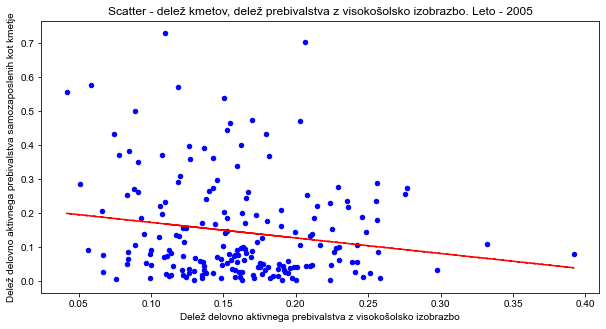

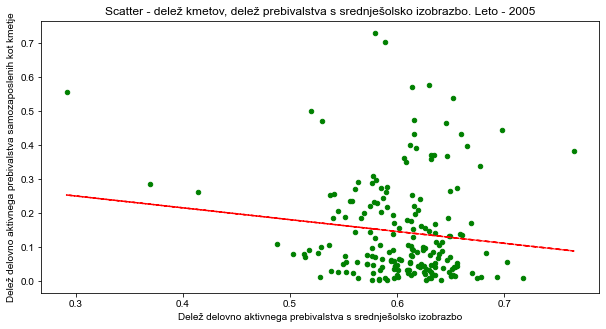

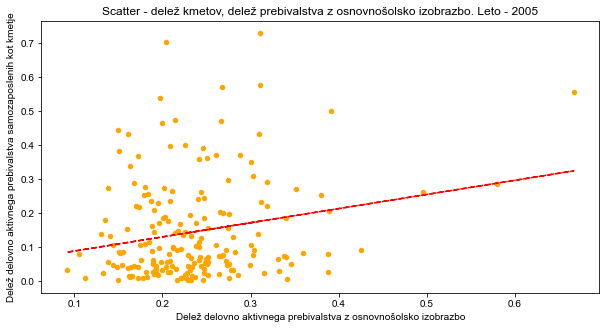

2006
VS:
(-0.1757650783331175, 0.01448483993513802)
SS:
(-0.13073833382029762, 0.06994561468734674)
OS:
(0.2260323019645096, 0.0015736341753287252)


<Figure size 3600x10080 with 0 Axes>

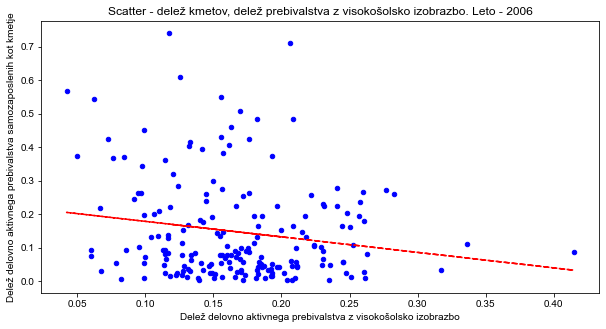

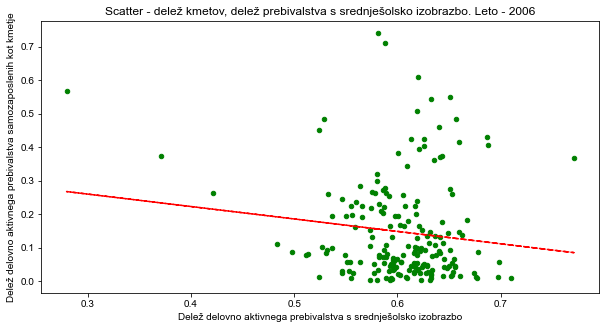

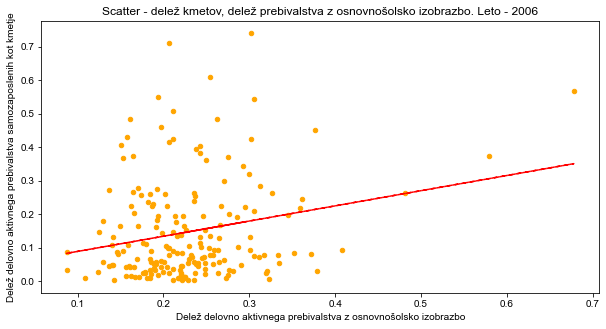

2007
VS:
(-0.21421867473241385, 0.0017955440415027976)
SS:
(-0.04498110745144972, 0.516806616470268)
OS:
(0.2064667490851149, 0.0026419463528355638)


<Figure size 3600x10080 with 0 Axes>

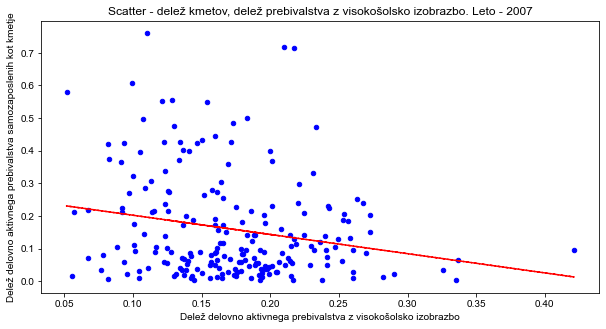

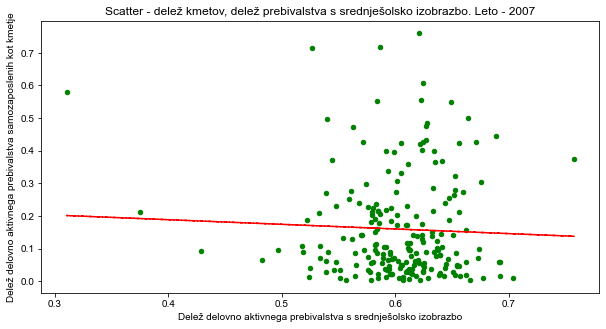

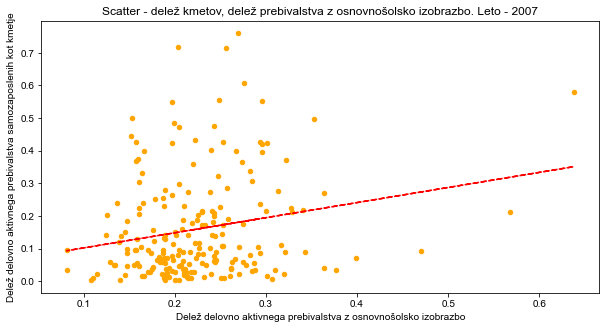

2008
VS:
(-0.2170140853185331, 0.0015569554326687563)
SS:
(-0.03424441347055629, 0.6217077474422958)
OS:
(0.20607021776443593, 0.002693688638264523)


<Figure size 3600x10080 with 0 Axes>

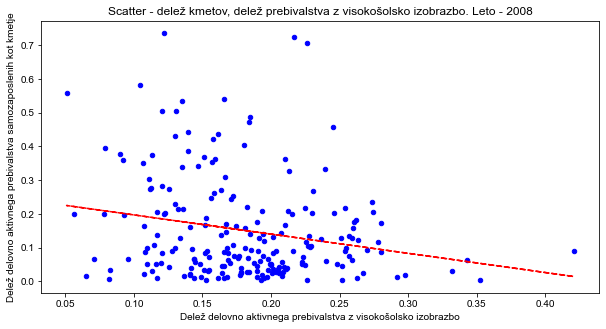

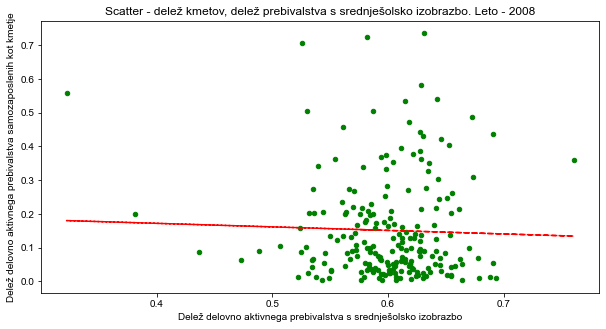

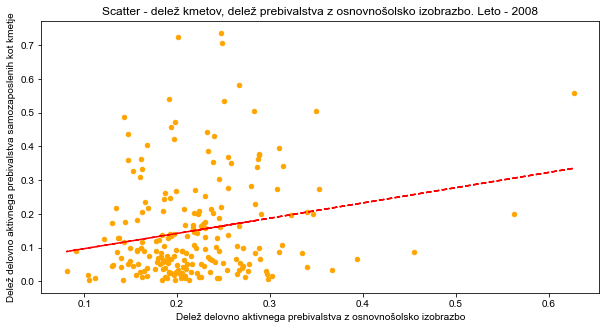

2009
VS:
(-0.198805447007662, 0.0038194644151827543)
SS:
(-0.042538452068687616, 0.5398505969515153)
OS:
(0.21913769084038198, 0.0013954832375717675)


<Figure size 3600x10080 with 0 Axes>

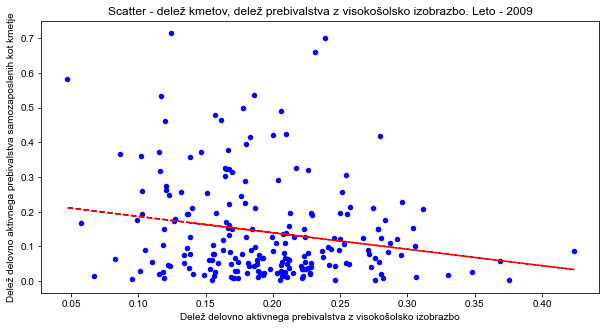

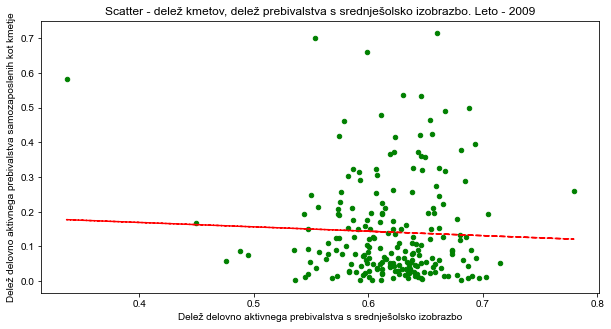

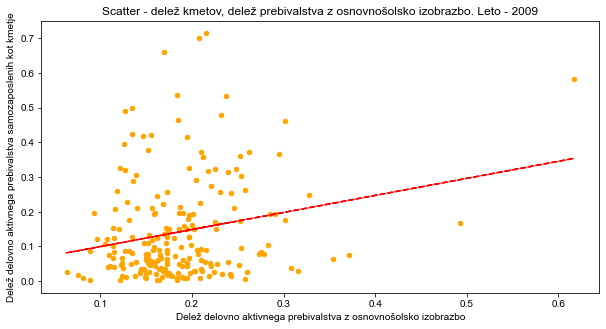

2010
VS:
(-0.20396171968246135, 0.002984582683831718)
SS:
(-0.02421433908519135, 0.7271975366353076)
OS:
(0.22751760061963486, 0.0008968698338404454)


<Figure size 3600x10080 with 0 Axes>

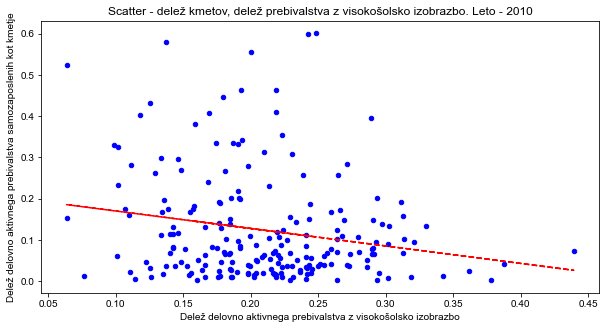

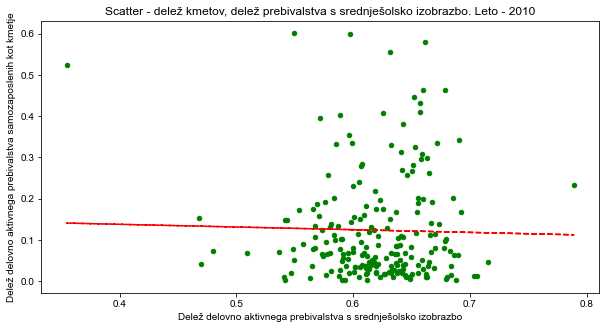

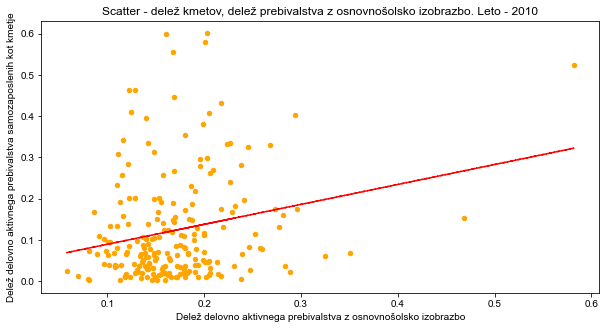

2011
VS:
(-0.20856537467429292, 0.00238281874004602)
SS:
(-0.0585552628855049, 0.3985541582467461)
OS:
(0.25355984993633324, 0.00020451843686427362)


<Figure size 3600x10080 with 0 Axes>

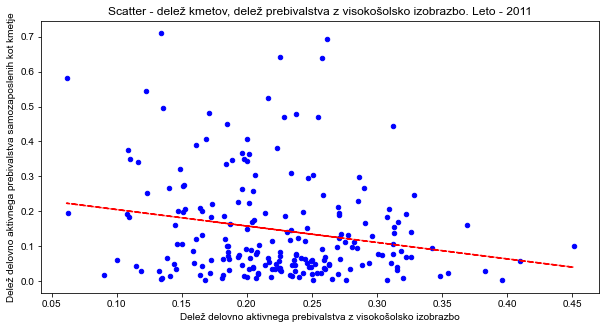

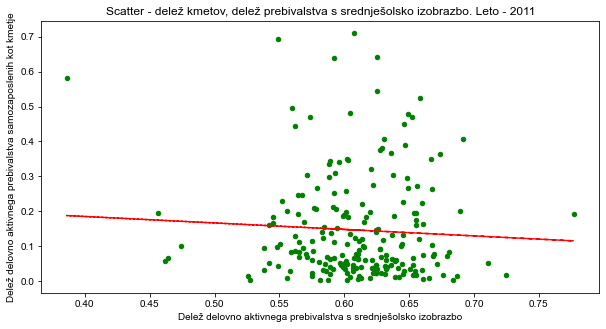

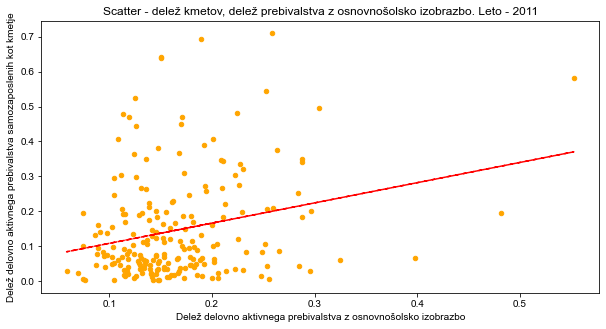

2012
VS:
(-0.184978544651697, 0.007053700918484954)
SS:
(-0.04008767303712466, 0.5625346521001332)
OS:
(0.24270074674999076, 0.00037392721646542997)


<Figure size 3600x10080 with 0 Axes>

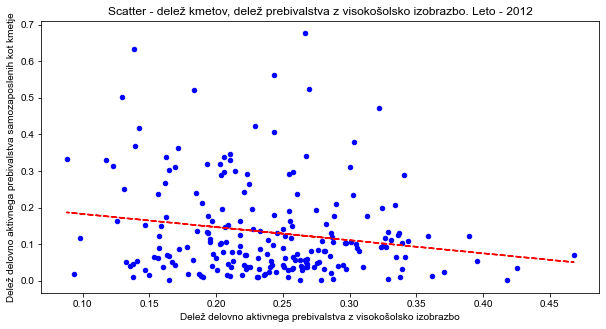

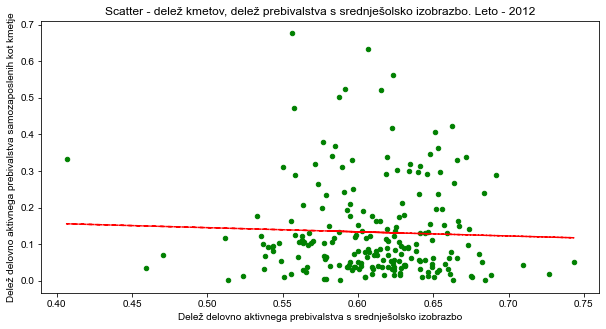

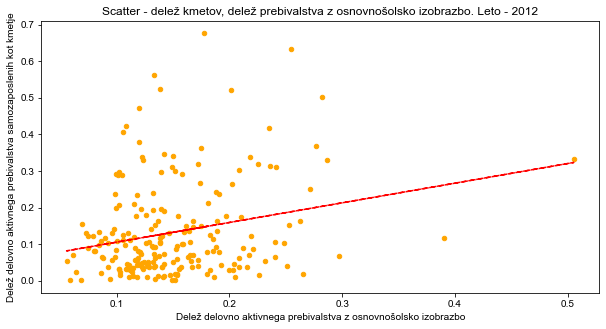

2013
VS:
(-0.17844272307829093, 0.009390137815070417)
SS:
(-0.04992556525336678, 0.47069254124005916)
OS:
(0.25810684752478924, 0.0001498065647544437)


<Figure size 3600x10080 with 0 Axes>

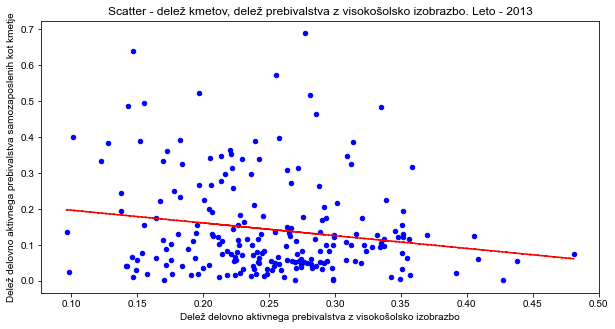

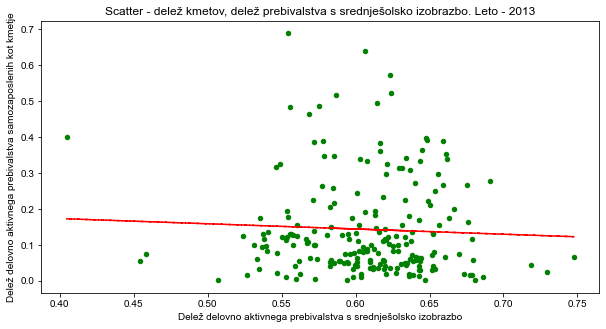

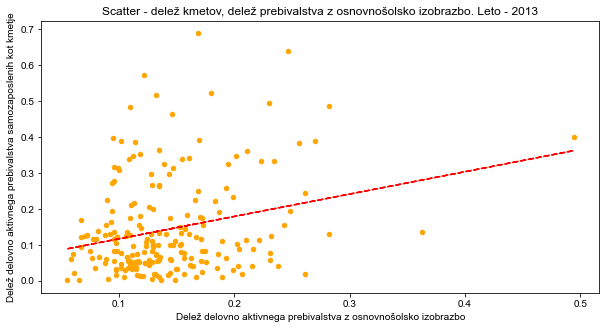

2014
VS:
(-0.15637734421272742, 0.023085645686779146)
SS:
(-0.03447689069544223, 0.6184989330499561)
OS:
(0.23736102250902696, 0.0005066551834467782)


<Figure size 3600x10080 with 0 Axes>

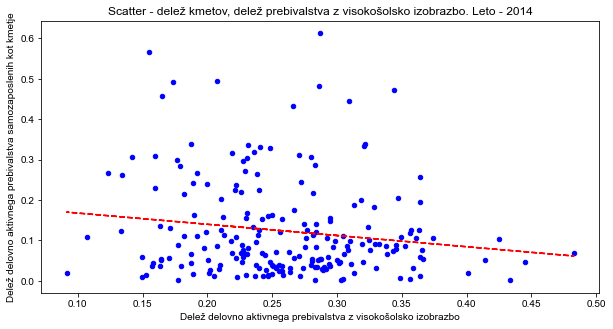

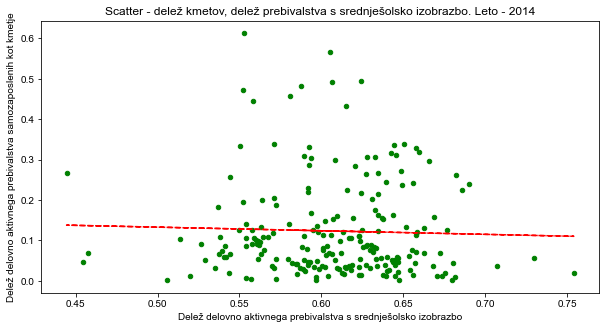

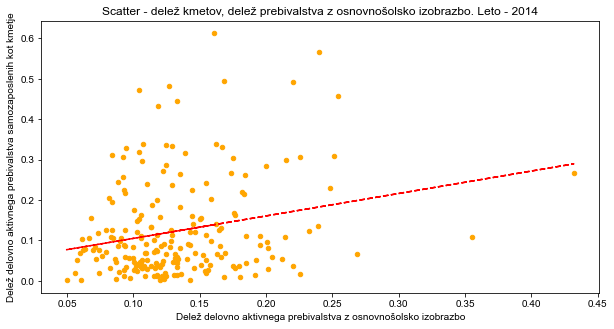

2015
VS:
(-0.16179523262612483, 0.01840343183054575)
SS:
(0.006313002160593689, 0.9271937047785196)
OS:
(0.2312043858798544, 0.0006924085752974513)


<Figure size 3600x10080 with 0 Axes>

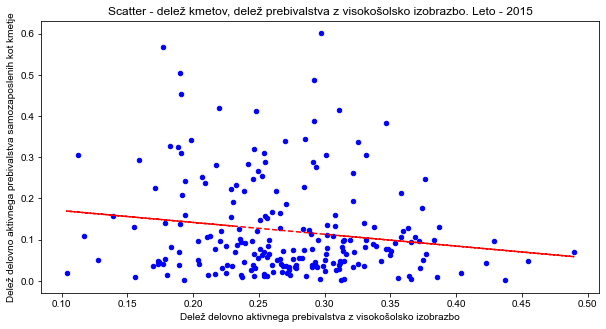

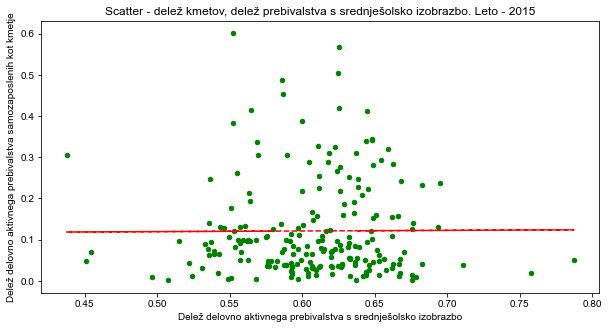

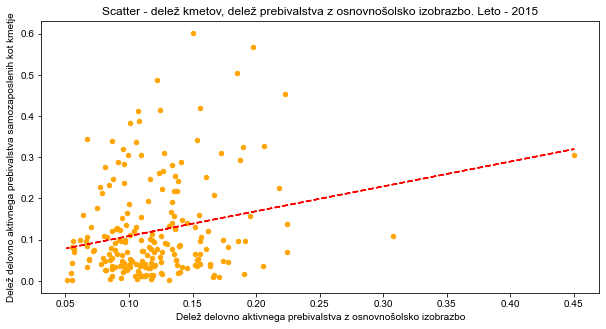

In [15]:
from scipy.stats.stats import pearsonr   
for i in range(2005, 2016):
    font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 10}

    plt.rc('font', **font)
    print(i)
    plt.figure(figsize=(50,140))
    mesta2 = slovar2[i][0]
    delez_kmetov = slovar2[i][1]
    
    mesta = slovar[i][0]
    statis_VS = slovar[i][2]
    statis_SS = slovar[i][4]
    statis_OS = slovar[i][6]
   
    print("VS:")
    print(pearsonr(delez_kmetov,statis_VS))
    print("SS:")
    print(pearsonr(delez_kmetov,statis_SS))
    print("OS:")
    print(pearsonr(delez_kmetov,statis_OS))
    df_list = pd.DataFrame(
    {'statis_VS': statis_VS,
     'statis_SS': statis_SS,
     'statis_OS': statis_OS,
     'delez_kmetov': delez_kmetov
    })
    
    
    df_list.plot.scatter(x = "statis_VS", y = "delez_kmetov", c="blue", figsize=(10,5)) 
    plt.title(f"Scatter - delež kmetov, delež prebivalstva z visokošolsko izobrazbo. Leto - {i}")
    plt.xlabel("Delež delovno aktivnega prebivalstva z visokošolsko izobrazbo")
    plt.ylabel("Delež delovno aktivnega prebivalstva samozaposlenih kot kmetje")
    z = np.polyfit(statis_VS, delez_kmetov, 1)
    p = np.poly1d(z)
    plt.plot(statis_VS,p(statis_VS),"r--")
    
    df_list.plot.scatter(x = "statis_SS", y = "delez_kmetov", c="green", figsize=(10,5)) 
    plt.title(f"Scatter - delež kmetov, delež prebivalstva s srednješolsko izobrazbo. Leto - {i}")
    plt.xlabel("Delež delovno aktivnega prebivalstva s srednješolsko izobrazbo")
    plt.ylabel("Delež delovno aktivnega prebivalstva samozaposlenih kot kmetje")
    z = np.polyfit(statis_SS, delez_kmetov, 1)
    p = np.poly1d(z)
    plt.plot(statis_SS,p(statis_SS),"r--")
    
    df_list.plot.scatter(x = "statis_OS", y = "delez_kmetov", c="orange",figsize=(10,5)) 
    plt.title(f"Scatter - delež kmetov, delež prebivalstva z osnovnošolsko izobrazbo. Leto - {i}")
    plt.xlabel("Delež delovno aktivnega prebivalstva z osnovnošolsko izobrazbo")
    plt.ylabel("Delež delovno aktivnega prebivalstva samozaposlenih kot kmetje")
    z = np.polyfit(statis_OS, delez_kmetov, 1)
    p = np.poly1d(z)
    plt.plot(statis_OS,p(statis_OS),"r--")
    
    
    plt.show()

    


In [16]:
## EXCEL OUTPUT (Za zemljevide)
#for i in range (2005, 2022):
#    os = zip(slovar[i][0],slovar[i][6])
#    pd.DataFrame(os).to_excel('os' + str(i) + '.xlsx', header=False, index=False)
#    ss = zip(slovar[i][0],slovar[i][4])
#    pd.DataFrame(ss).to_excel('ss' + str(i) + '.xlsx', header=False, index=False)
#    vs = zip(slovar[i][0],slovar[i][2])
#    pd.DataFrame(vs).to_excel('vs' + str(i) + '.xlsx', header=False, index=False)

In [ ]:
### VISOKOŠOLSKA
### ABSOLUTNE VREDNOSTI ###

for i in range(2005, 2022):
    font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 40}

    plt.rc('font', **font)

    plt.figure(figsize=(50,140))

    plt.title(f"Absolutno število - Visokošolska izobrazba Leto - {i}")
    mesta = slovar[i][0]
    statis_VS = slovar[i][1] 
    mesta_sorted = [x for _,x in sorted(zip(statis_VS, mesta))]
    statis_VS_sorted = sorted(statis_VS)

    cc=['colors']*len(statis_VS_sorted)
    for n,val in enumerate(statis_VS_sorted):
        if val<500:
            cc[n]='lightskyblue'
        elif val>=500 and val<1000:
            cc[n]='deepskyblue'
        elif val>=1000 and val<2500:
            cc[n]='dodgerblue'
        elif val >= 2500 and val < 4500:
            cc[n] ='royalblue'
        else:
            cc[n] ='navy'

    plt.barh(range(len(mesta_sorted)), statis_VS_sorted, color=cc, 
         tick_label=mesta_sorted)

    plt.show()


In [ ]:

### VISOKOŠOLSKA
### NORMALIZIRANE VREDNOSTI GLEDE NA POPULACIJO ###


for i in range(2005, 2022):

    font = {'family' : 'arial',
            'weight' : 'normal',
            'size'   : 40}

    plt.rc('font', **font)

    plt.figure(figsize=(50,140))
    
    plt.title(f"Normalizirano glede na populacijo - Visokošolska izobrazba Leto - {i}")
    mesta = slovar[i][0]
    normal_VS = slovar[i][2] 

    mesta_sorted = [x for _,x in sorted(zip(normal_VS, mesta))]
    normal_VS_sorted = sorted(normal_VS)

    cc=['colors']*len(normal_VS_sorted)
    for n,val in enumerate(normal_VS_sorted):
        if val < 0.05:
            cc[n]='aquamarine'
        elif val >= 0.05 and val<0.1:
            cc[n]='turquoise'
        elif val >= 0.1 and val<0.15:
            cc[n]='darkcyan'
        elif val >= 0.15 and val<0.20:
            cc[n]='lavender'
        elif val >= 0.20 and val < 0.25:
            cc[n] ='lightsteelblue'
        elif val >= 0.25 and val < 0.30:
            cc[n] ='lightskyblue'
        elif val >= 0.30 and val < 0.35:
            cc[n] ='deepskyblue'
        elif val >= 0.35 and val < 0.40:
            cc[n] ='dodgerblue'
        elif val >= 0.40 and val < 0.45:
            cc[n] ='royalblue' 
        else:
            cc[n] ='navy'

    plt.barh(range(len(mesta_sorted)), normal_VS_sorted, color=cc, 
         tick_label=mesta_sorted)

    plt.show()


In [ ]:
### SREDNJEŠOLSKA
### ABSOLUTNE VREDNOSTI ###

for i in range(2005, 2022):
    font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 40}

    plt.rc('font', **font)

    plt.figure(figsize=(50,140))

    plt.title(f"Absolutno število - Srednješolska izobrazba Leto - {i}")
    mesta = slovar[i][0]
    statis_VS = slovar[i][3] 
    mesta_sorted = [x for _,x in sorted(zip(statis_VS, mesta))]
    statis_VS_sorted = sorted(statis_VS)

    cc=['colors']*len(statis_VS_sorted)
    for n,val in enumerate(statis_VS_sorted):
        if val<500:
            cc[n]='lightskyblue'
        elif val>=500 and val<1000:
            cc[n]='deepskyblue'
        elif val>=1000 and val<2500:
            cc[n]='dodgerblue'
        elif val >= 2500 and val < 4500:
            cc[n] ='royalblue'
        else:
            cc[n] ='navy'


    plt.barh(range(len(mesta_sorted)), statis_VS_sorted, color=cc, 
         tick_label=mesta_sorted)

    plt.show()


In [ ]:

### SREDNJEŠOLSKA
### NORMALIZIRANE VREDNOSTI GLEDE NA POPULACIJO ###


for i in range(2005, 2022):

    font = {'family' : 'arial',
            'weight' : 'normal',
            'size'   : 40}

    plt.rc('font', **font)

    plt.figure(figsize=(50,140))
    
    plt.title(f"Normalizirano glede na populacijo - Srednješolska izobrazba Leto - {i}")
    mesta = slovar[i][0]
    normal_VS = slovar[i][4] 

    mesta_sorted = [x for _,x in sorted(zip(normal_VS, mesta))]
    normal_VS_sorted = sorted(normal_VS)

    cc=['colors']*len(normal_VS_sorted)
    for n,val in enumerate(normal_VS_sorted):
        if val < 0.05:
            cc[n]='aquamarine'
        elif val >= 0.05 and val<0.1:
            cc[n]='turquoise'
        elif val >= 0.1 and val<0.15:
            cc[n]='darkcyan'
        elif val >= 0.15 and val<0.20:
            cc[n]='lavender'
        elif val >= 0.20 and val < 0.25:
            cc[n] ='lightsteelblue'
        elif val >= 0.25 and val < 0.30:
            cc[n] ='lightskyblue'
        elif val >= 0.30 and val < 0.35:
            cc[n] ='deepskyblue'
        elif val >= 0.35 and val < 0.40:
            cc[n] ='dodgerblue'
        elif val >= 0.40 and val < 0.45:
            cc[n] ='royalblue' 
        else:
            cc[n] ='navy'

    plt.barh(range(len(mesta_sorted)), normal_VS_sorted, color=cc, 
         tick_label=mesta_sorted)

    plt.show()


In [ ]:
### OSNOVNOŠOLSKA
### ABSOLUTNE VREDNOSTI ###

for i in range(2005, 2022):
    font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 40}

    plt.rc('font', **font)

    plt.figure(figsize=(50,140))

    plt.title(f"Absolutno število - Osnovnošolska izobrazba Leto - {i}")
    mesta = slovar[i][0]
    statis_VS = slovar[i][5] 
    mesta_sorted = [x for _,x in sorted(zip(statis_VS, mesta))]
    statis_VS_sorted = sorted(statis_VS)

    cc=['colors']*len(statis_VS_sorted)
    for n,val in enumerate(statis_VS_sorted):
        if val<500:
            cc[n]='lightskyblue'
        elif val>=500 and val<1000:
            cc[n]='deepskyblue'
        elif val>=1000 and val<2500:
            cc[n]='dodgerblue'
        elif val >= 2500 and val < 4500:
            cc[n] ='royalblue'
        else:
            cc[n] ='navy'


    plt.barh(range(len(mesta_sorted)), statis_VS_sorted, color=cc, 
         tick_label=mesta_sorted)
    plt.show()


In [ ]:

### OSNOVNOŠOLSKA
### NORMALIZIRANE VREDNOSTI GLEDE NA POPULACIJO ###


for i in range(2005, 2022):

    font = {'family' : 'arial',
            'weight' : 'normal',
            'size'   : 40}

    plt.rc('font', **font)

    plt.figure(figsize=(50,140))
    
    plt.title(f"Normalizirano glede na populacijo - Osnovnošolska izobrazba Leto - {i}")
    mesta = slovar[i][0]
    normal_VS = slovar[i][6] 

    mesta_sorted = [x for _,x in sorted(zip(normal_VS, mesta))]
    normal_VS_sorted = sorted(normal_VS)

    cc=['colors']*len(normal_VS_sorted)
    for n,val in enumerate(normal_VS_sorted):
        if val < 0.05:
            cc[n]='aquamarine'
        elif val >= 0.05 and val<0.1:
            cc[n]='turquoise'
        elif val >= 0.1 and val<0.15:
            cc[n]='darkcyan'
        elif val >= 0.15 and val<0.20:
            cc[n]='lavender'
        elif val >= 0.20 and val < 0.25:
            cc[n] ='lightsteelblue'
        elif val >= 0.25 and val < 0.30:
            cc[n] ='lightskyblue'
        elif val >= 0.30 and val < 0.35:
            cc[n] ='deepskyblue'
        elif val >= 0.35 and val < 0.40:
            cc[n] ='dodgerblue'
        elif val >= 0.40 and val < 0.45:
            cc[n] ='royalblue' 
        else:
            cc[n] ='navy'

    plt.barh(range(len(mesta_sorted)), normal_VS_sorted, color=cc, 
         tick_label=mesta_sorted)

    plt.show()


In [23]:
def rolling_avg_list(velikost_okna, seznam):
    vsota = 0
    i = 0
    seznam1 = []
    sezrat = []
    for element in seznam:
        i+=1
        sezrat.append(element)
        vsota+=element
        if (i>=velikost_okna):
            seznam1.append(vsota/velikost_okna)
            vsota-= sezrat.pop(0)
            
    return seznam1


In [24]:
LJ_vs_pet = rolling_avg_list(5, LJ_vs)
LJ_ss_pet = rolling_avg_list(5, LJ_ss)
LJ_os_pet = rolling_avg_list(5, LJ_os)

MB_vs_pet = rolling_avg_list(5, MB_vs)
MB_ss_pet = rolling_avg_list(5, MB_ss)
MB_os_pet = rolling_avg_list(5, MB_os)

KP_vs_pet = rolling_avg_list(5, KP_vs)
KP_ss_pet = rolling_avg_list(5, KP_ss)
KP_os_pet = rolling_avg_list(5, KP_os)

CE_vs_pet = rolling_avg_list(5, CE_vs)
CE_ss_pet = rolling_avg_list(5, CE_ss)
CE_os_pet = rolling_avg_list(5, CE_os)

BL_vs_pet = rolling_avg_list(5, BL_vs)
BL_ss_pet = rolling_avg_list(5, BL_ss)
BL_os_pet = rolling_avg_list(5, BL_os)


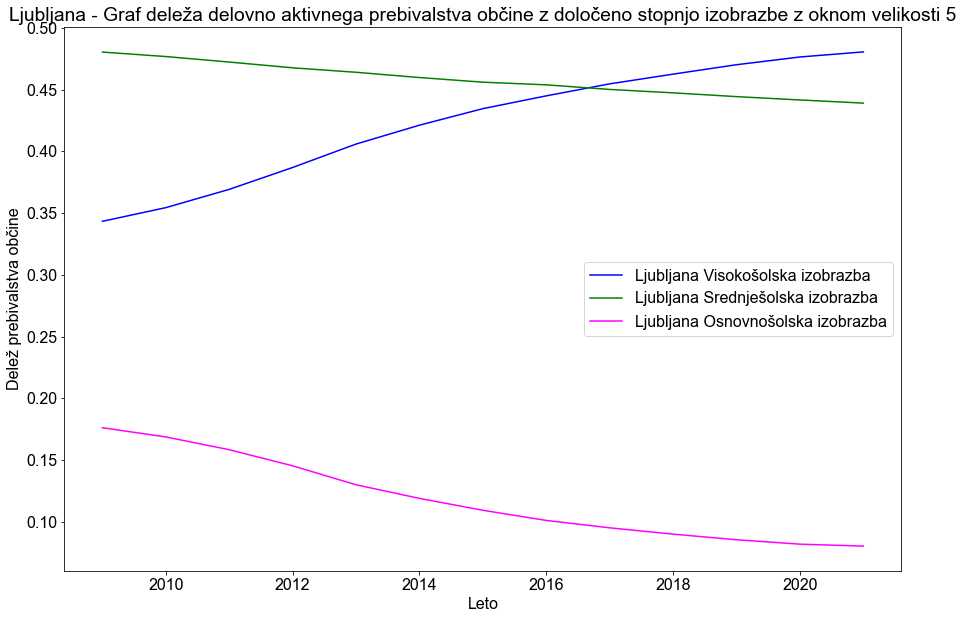

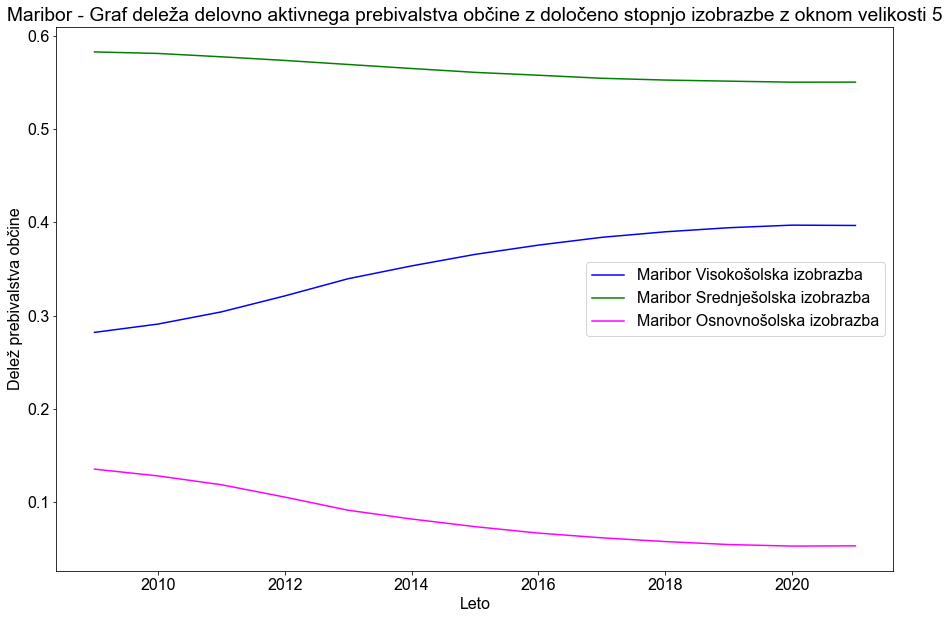

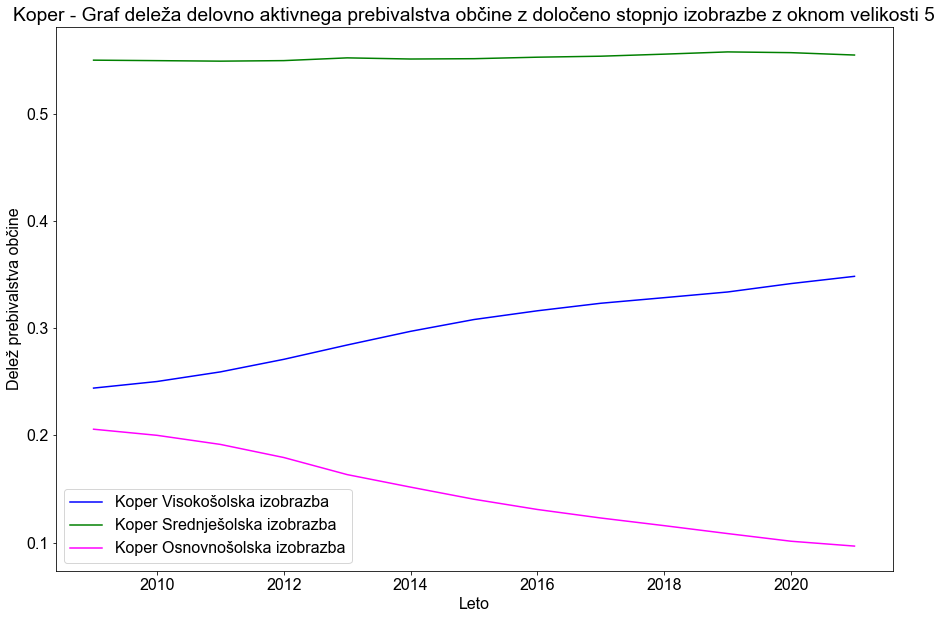

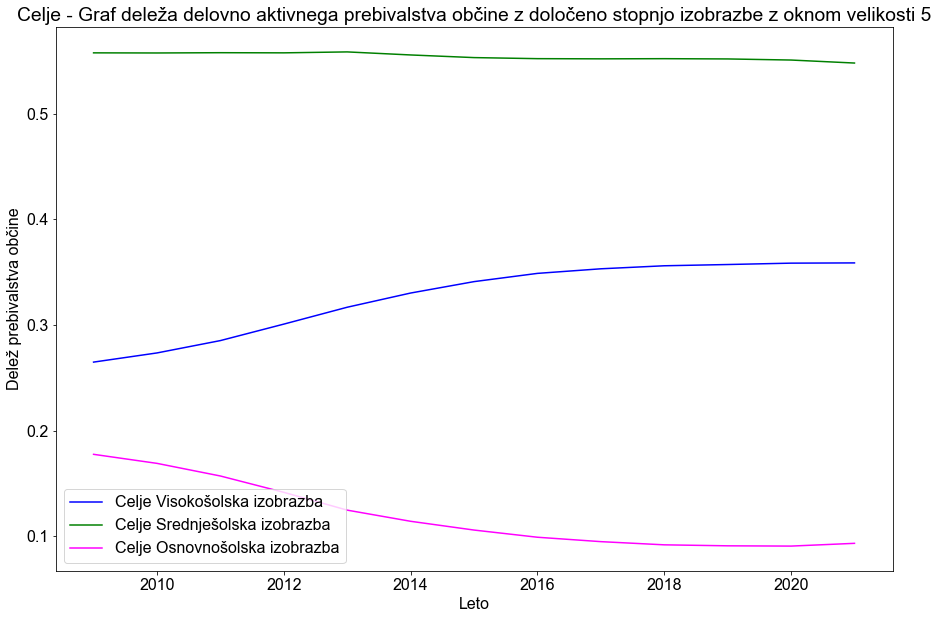

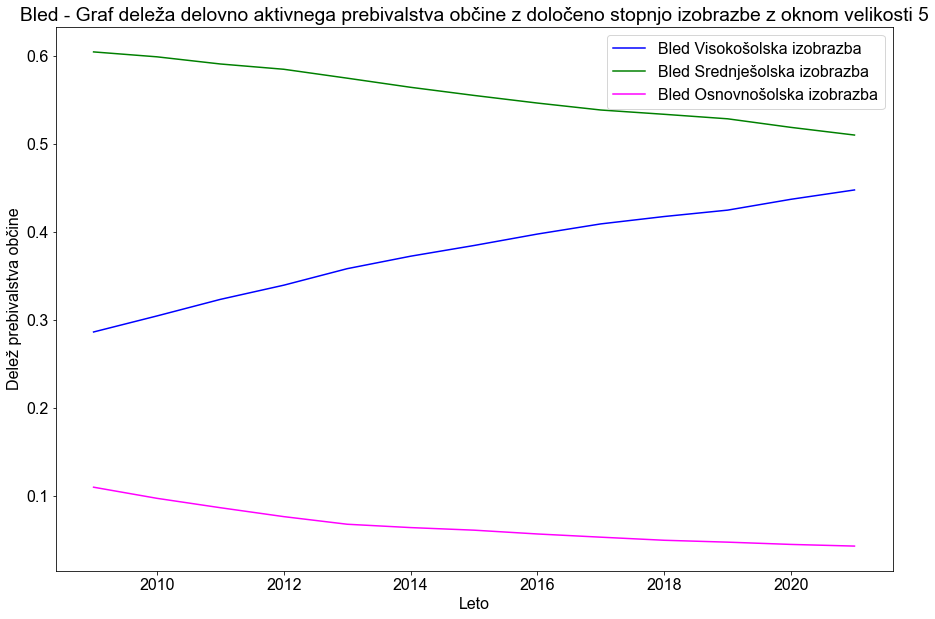

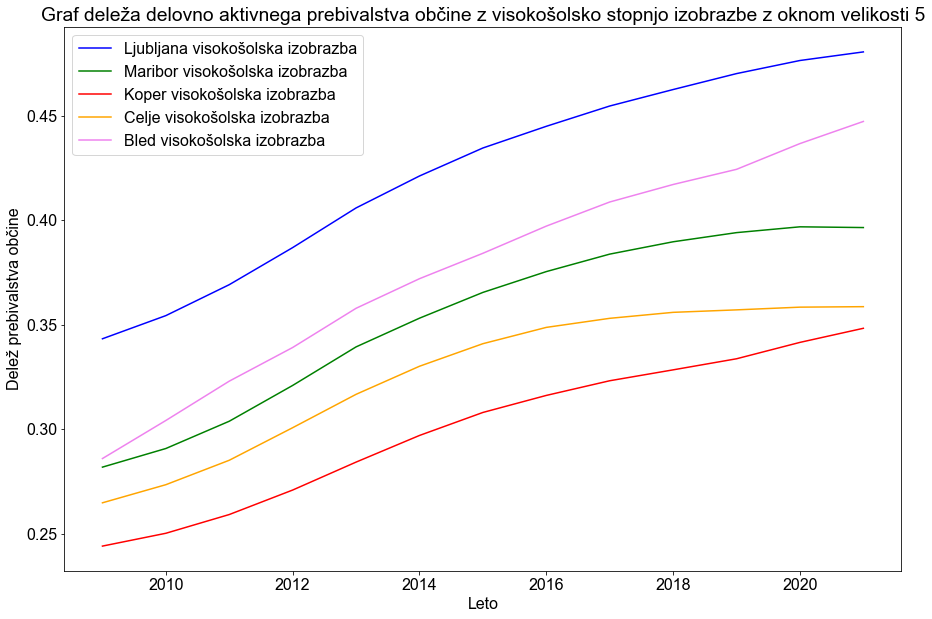

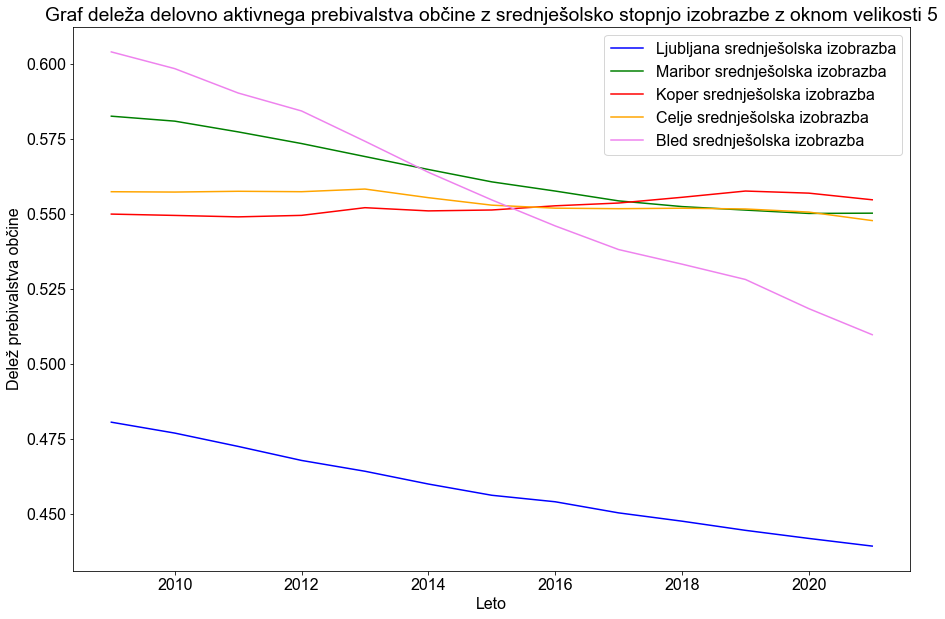

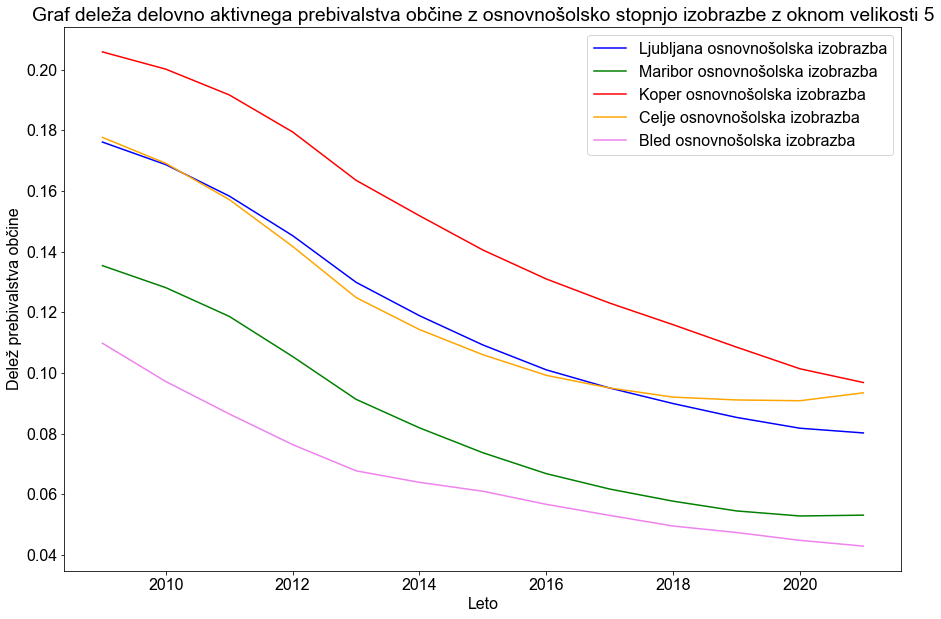

In [25]:
### ROLLING AVERAGE - LJUBLJANA, MARIBOR, KOPER, BLED, ILIRSKA BISTRICA ###



font = {'family' : 'arial',
            'weight' : 'normal',
            'size'   : 16}

plt.rc('font', **font)

# LJUBLJANA 
plt.figure(figsize=(15, 10))
plt.xlabel("Leto")
plt.ylabel("Delež prebivalstva občine")
plt.title("Ljubljana - Graf deleža delovno aktivnega prebivalstva občine z določeno stopnjo izobrazbe z oknom velikosti 5")

plt.plot(list(range(2009, 2022)), LJ_vs_pet, color='blue', label="Ljubljana Visokošolska izobrazba")
plt.plot(list(range(2009, 2022)), LJ_ss_pet, color='green', label="Ljubljana Srednješolska izobrazba")
plt.plot(list(range(2009, 2022)), LJ_os_pet, color='fuchsia', label="Ljubljana Osnovnošolska izobrazba")
plt.legend()
plt.show()

# MARIBOR
plt.figure(figsize=(15, 10))
plt.xlabel("Leto")
plt.ylabel("Delež prebivalstva občine")
plt.title("Maribor - Graf deleža delovno aktivnega prebivalstva občine z določeno stopnjo izobrazbe z oknom velikosti 5")

plt.plot(list(range(2009, 2022)), MB_vs_pet, color='blue', label="Maribor Visokošolska izobrazba")
plt.plot(list(range(2009, 2022)), MB_ss_pet, color='green', label="Maribor Srednješolska izobrazba")
plt.plot(list(range(2009, 2022)), MB_os_pet, color='fuchsia', label="Maribor Osnovnošolska izobrazba")
plt.legend()
plt.show()

# KOPER
plt.figure(figsize=(15, 10))
plt.xlabel("Leto")
plt.ylabel("Delež prebivalstva občine")
plt.title("Koper - Graf deleža delovno aktivnega prebivalstva občine z določeno stopnjo izobrazbe z oknom velikosti 5")

plt.plot(list(range(2009, 2022)), KP_vs_pet, color='blue', label="Koper Visokošolska izobrazba")
plt.plot(list(range(2009, 2022)), KP_ss_pet, color='green', label="Koper Srednješolska izobrazba")
plt.plot(list(range(2009, 2022)), KP_os_pet, color='fuchsia', label="Koper Osnovnošolska izobrazba")
plt.legend()
plt.show()

# CELJE
plt.figure(figsize=(15, 10))
plt.xlabel("Leto")
plt.ylabel("Delež prebivalstva občine")
plt.title("Celje - Graf deleža delovno aktivnega prebivalstva občine z določeno stopnjo izobrazbe z oknom velikosti 5")

plt.plot(list(range(2009, 2022)), CE_vs_pet, color='blue', label="Celje Visokošolska izobrazba")
plt.plot(list(range(2009, 2022)), CE_ss_pet, color='green', label="Celje Srednješolska izobrazba")
plt.plot(list(range(2009, 2022)), CE_os_pet, color='fuchsia', label="Celje Osnovnošolska izobrazba")
plt.legend()
plt.show()

# BLED
plt.figure(figsize=(15, 10))
plt.xlabel("Leto")
plt.ylabel("Delež prebivalstva občine")
plt.title("Bled - Graf deleža delovno aktivnega prebivalstva občine z določeno stopnjo izobrazbe z oknom velikosti 5")

plt.plot(list(range(2009, 2022)), BL_vs_pet, color='blue', label="Bled Visokošolska izobrazba")
plt.plot(list(range(2009, 2022)), BL_ss_pet, color='green', label="Bled Srednješolska izobrazba")
plt.plot(list(range(2009, 2022)), BL_os_pet, color='fuchsia', label="Bled Osnovnošolska izobrazba")
plt.legend()
plt.show()


# PRIMERJAVA VISOKOŠOLSKE

plt.figure(figsize=(15, 10))
plt.xlabel("Leto")
plt.ylabel("Delež prebivalstva občine")
plt.title("Graf deleža delovno aktivnega prebivalstva občine z visokošolsko stopnjo izobrazbe z oknom velikosti 5")

plt.plot(list(range(2009, 2022)), LJ_vs_pet, color='blue', label="Ljubljana visokošolska izobrazba")
plt.plot(list(range(2009, 2022)), MB_vs_pet, color='green', label="Maribor visokošolska izobrazba")
plt.plot(list(range(2009, 2022)), KP_vs_pet, color='red', label="Koper visokošolska izobrazba")
plt.plot(list(range(2009, 2022)), CE_vs_pet, color='orange', label="Celje visokošolska izobrazba")
plt.plot(list(range(2009, 2022)), BL_vs_pet, color='violet', label="Bled visokošolska izobrazba")
plt.legend()
plt.show()


# PRIMERJAVA SREDNJEŠOLSKE

plt.figure(figsize=(15, 10))
plt.xlabel("Leto")
plt.ylabel("Delež prebivalstva občine")
plt.title("Graf deleža delovno aktivnega prebivalstva občine z srednješolsko stopnjo izobrazbe z oknom velikosti 5")

plt.plot(list(range(2009, 2022)), LJ_ss_pet, color='blue', label="Ljubljana srednješolska izobrazba")
plt.plot(list(range(2009, 2022)), MB_ss_pet, color='green', label="Maribor srednješolska izobrazba")
plt.plot(list(range(2009, 2022)), KP_ss_pet, color='red', label="Koper srednješolska izobrazba")
plt.plot(list(range(2009, 2022)), CE_ss_pet, color='orange', label="Celje srednješolska izobrazba")
plt.plot(list(range(2009, 2022)), BL_ss_pet, color='violet', label="Bled srednješolska izobrazba")
plt.legend()
plt.show()



# PRIMERJAVA OSNOVNOŠOLSKE

plt.figure(figsize=(15, 10))
plt.xlabel("Leto")
plt.ylabel("Delež prebivalstva občine")
plt.title("Graf deleža delovno aktivnega prebivalstva občine z osnovnošolsko stopnjo izobrazbe z oknom velikosti 5")

plt.plot(list(range(2009, 2022)), LJ_os_pet, color='blue', label="Ljubljana osnovnošolska izobrazba")
plt.plot(list(range(2009, 2022)), MB_os_pet, color='green', label="Maribor osnovnošolska izobrazba")
plt.plot(list(range(2009, 2022)), KP_os_pet, color='red', label="Koper osnovnošolska izobrazba")
plt.plot(list(range(2009, 2022)), CE_os_pet, color='orange', label="Celje osnovnošolska izobrazba")
plt.plot(list(range(2009, 2022)), BL_os_pet, color='violet', label="Bled osnovnošolska izobrazba")
plt.legend()
plt.show()
